### Import visualization libraries 

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

### Read in the csv file as a dataframe called df

In [12]:
df=pd.read_csv('top_hiphop_artists_tracks.csv')

### 1.Calculate the average popularity score of the tracks.

In [5]:
df['Popularity'].mean()

75.73636363636363

### 3.Calculate the correlation between popularity scores and track durations.

In [11]:
df['Popularity'].corr(df['Duration (ms)'])


0.04074487217075256

### 5.Load the dataset and display the first few rows to understand its structure.

In [13]:
df.head()

,Artist,Track Name,Popularity,Duration (ms),Track ID
0,Drake,Rich Baby Daddy (feat. Sexyy Red & SZA),92,319191,1yeB8MUNeLo9Ek1UEpsyz6
1,Drake,One Dance,91,173986,1zi7xx7UVEFkmKfv06H8x0
2,Drake,IDGAF (feat. Yeat),90,260111,2YSzYUF3jWqb9YP9VXmpjE
3,Drake,First Person Shooter (feat. J. Cole),88,247444,7aqfrAY2p9BUSiupwk3svU
4,Drake,Jimmy Cooks (feat. 21 Savage),88,218364,3F5CgOj3wFlRv51JsHbxhe


### 6.Check for missing values in the dataset and handle them appropriately.

In [19]:
df.isna()

,Artist,Track Name,Popularity,Duration (ms),Track ID
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
435,False,False,False,False,False
436,False,False,False,False,False
437,False,False,False,False,False
438,False,False,False,False,False


In [20]:
df.isna().sum()

Artist           0
Track Name       0
Popularity       0
Duration (ms)    0
Track ID         0
dtype: int64

<Axes: >

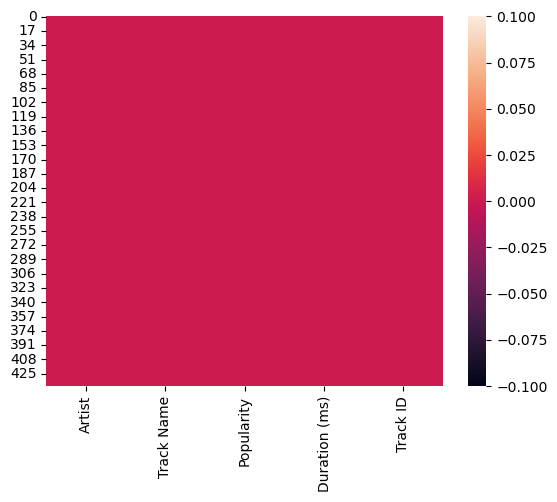

In [16]:
sns.heatmap(df.isnull())

### 7.Group the data by artist and calculate the average popularity score for each artist.

In [21]:
df.groupby('Artist')['Popularity'].mean()

Artist
*NSYNC                    67.000000
2 Chainz                  72.000000
21 Savage                 84.181818
A Boogie Wit da Hoodie    80.000000
A$AP Ferg                 69.000000
                            ...    
Young Nudy                67.000000
Young Thug                73.750000
benny blanco              72.000000
cassö                     92.000000
¥$                        86.090909
Name: Popularity, Length: 115, dtype: float64

### 8.Filter the dataset to only include tracks with a popularity score above a certain threshold.

In [28]:
df[df['Popularity']>70]

,Artist,Track Name,Popularity,Duration (ms),Track ID
0,Drake,Rich Baby Daddy (feat. Sexyy Red & SZA),92,319191,1yeB8MUNeLo9Ek1UEpsyz6
1,Drake,One Dance,91,173986,1zi7xx7UVEFkmKfv06H8x0
2,Drake,IDGAF (feat. Yeat),90,260111,2YSzYUF3jWqb9YP9VXmpjE
3,Drake,First Person Shooter (feat. J. Cole),88,247444,7aqfrAY2p9BUSiupwk3svU
4,Drake,Jimmy Cooks (feat. 21 Savage),88,218364,3F5CgOj3wFlRv51JsHbxhe
...,...,...,...,...,...
425,Offset,ON THE RIVER,75,96013,1aLpfH1M7Y4ZngOmSiHk0l
426,Offset,WORTH IT (feat. Don Toliver),72,188333,7kp6XhIxrvNb8BgTwLjaEx
427,21 Savage,Ghostface Killers (feat. Travis Scott),73,268933,5u6vkDnOyaf8LsteDAj2ub
428,Offset,BROAD DAY (feat. Future),72,168426,6Qc90FMwNUjJ2M893RdYUg


### 9.Sort the dataset based on track duration in descending order.

In [32]:
df.sort_values(by= 'Duration (ms)',ascending = False)

,Artist,Track Name,Popularity,Duration (ms),Track ID
419,DJ Khaled,"GOD DID (feat. Rick Ross, Lil Wayne, Jay-Z, Jo...",64,501648,2sOj9vyd6yiss9W1IK6chU
88,Eminem,Stan,84,404106,3UmaczJpikHgJFyBTAJVoz
91,Kendrick Lamar,Money Trees,82,386906,2HbKqm4o0w5wEeEFXm2sD4
173,Travis Scott,SKITZO (feat. Young Thug),78,366592,0bkV1iQHSxBaksUqgEkcbc
62,Drake,Forever,77,357706,5UsLjwBaTHBX4ektWIr4XX
...,...,...,...,...,...
357,Ice Spice,Munch (Feelin’ U),70,104819,1jOgJN75btuUONIdf57vHz
181,Central Cee,Doja,83,97392,3LtpKP5abr2qqjunvjlX5i
425,Offset,ON THE RIVER,75,96013,1aLpfH1M7Y4ZngOmSiHk0l
288,Playboi Carti,New Tank,79,89741,4txKMpsSfZRV6durPuHVq0


### 11.Create a bar chart to visualize the top N artists based on their average popularity scores.

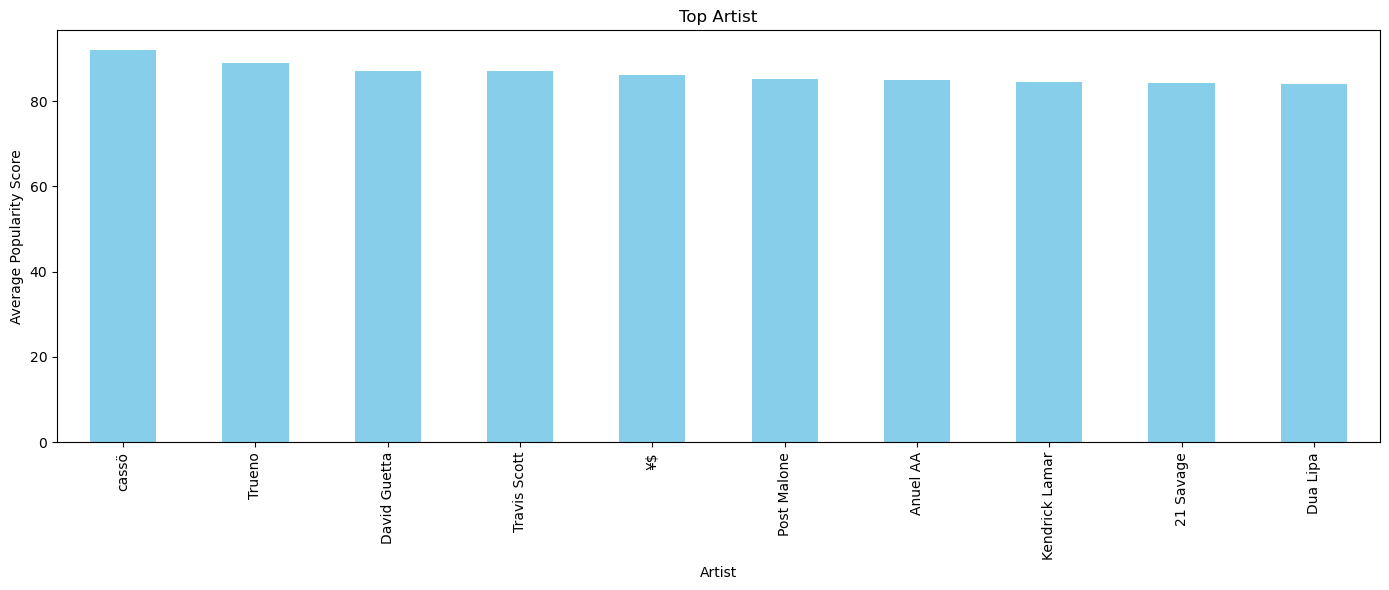

In [42]:
average_popularity=df.groupby('Artist')['Popularity'].mean()
top_artist= average_popularity.sort_values(ascending=False).head(10)

plt.figure(figsize=(14,6))
top_artist.plot(kind='bar',color='skyblue')
plt.title("Top Artist")
plt.xlabel('Artist')
plt.ylabel('Average Popularity Score')
plt.tight_layout()

### 12.Use subplots to compare the distributions of popularity scores and track durations side by side.

Text(0, 0.5, 'Frequency')

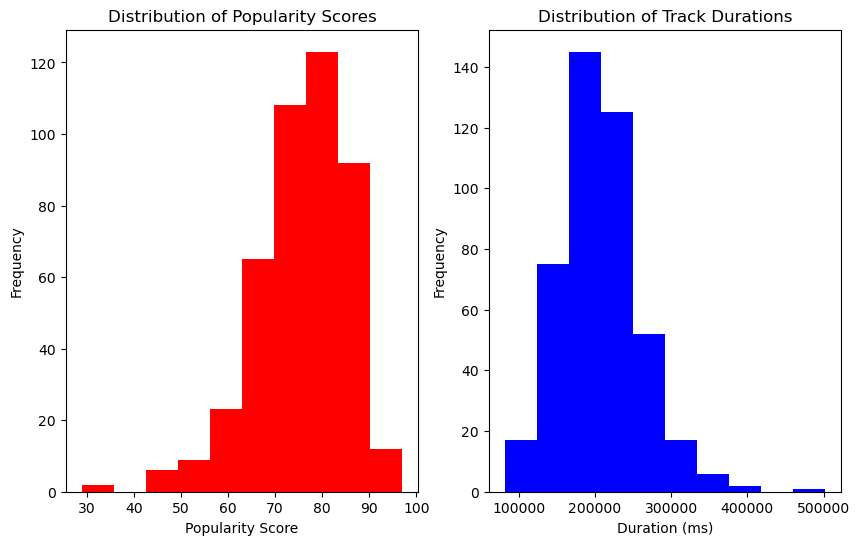

In [46]:
fig,axes = plt.subplots(1,2,figsize=(10,6))

axes[0].hist(df['Popularity'],color = "red")
axes[0].set_title('Distribution of Popularity Scores')
axes[0].set_xlabel('Popularity Score')
axes[0].set_ylabel('Frequency')

axes[1].hist(df['Duration (ms)'],color='blue')
axes[1].set_title('Distribution of Track Durations')
axes[1].set_xlabel('Duration (ms)')
axes[1].set_ylabel('Frequency')

### 13.Visualize the distribution of popularity scores using a histogram.

Text(0, 0.5, 'Frequency')

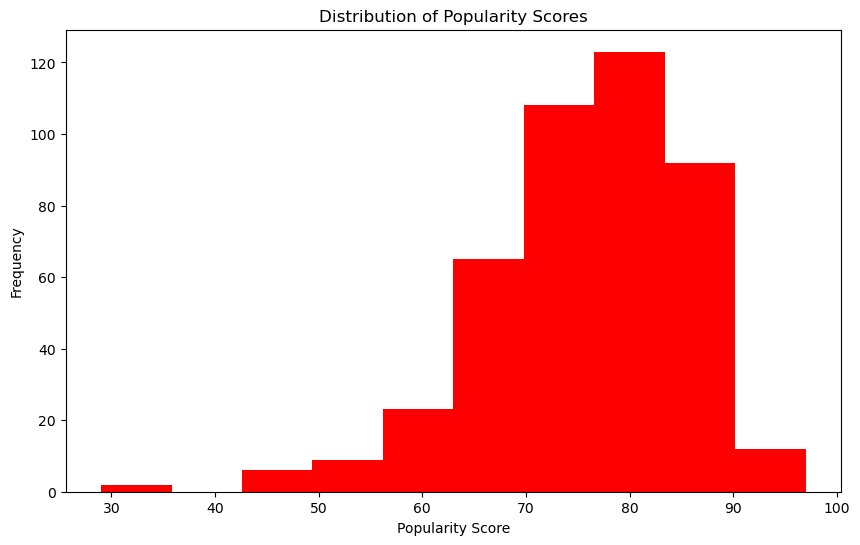

In [47]:
plt.figure(figsize=(10,6))
plt.hist(df['Popularity'],color='red')
plt.title('Distribution of Popularity Scores')
plt.xlabel('Popularity Score')
plt.ylabel('Frequency')

### 14. Create a boxplot to compare the popularity scores of tracks across different artists.

<Axes: xlabel='Artist', ylabel='Popularity'>

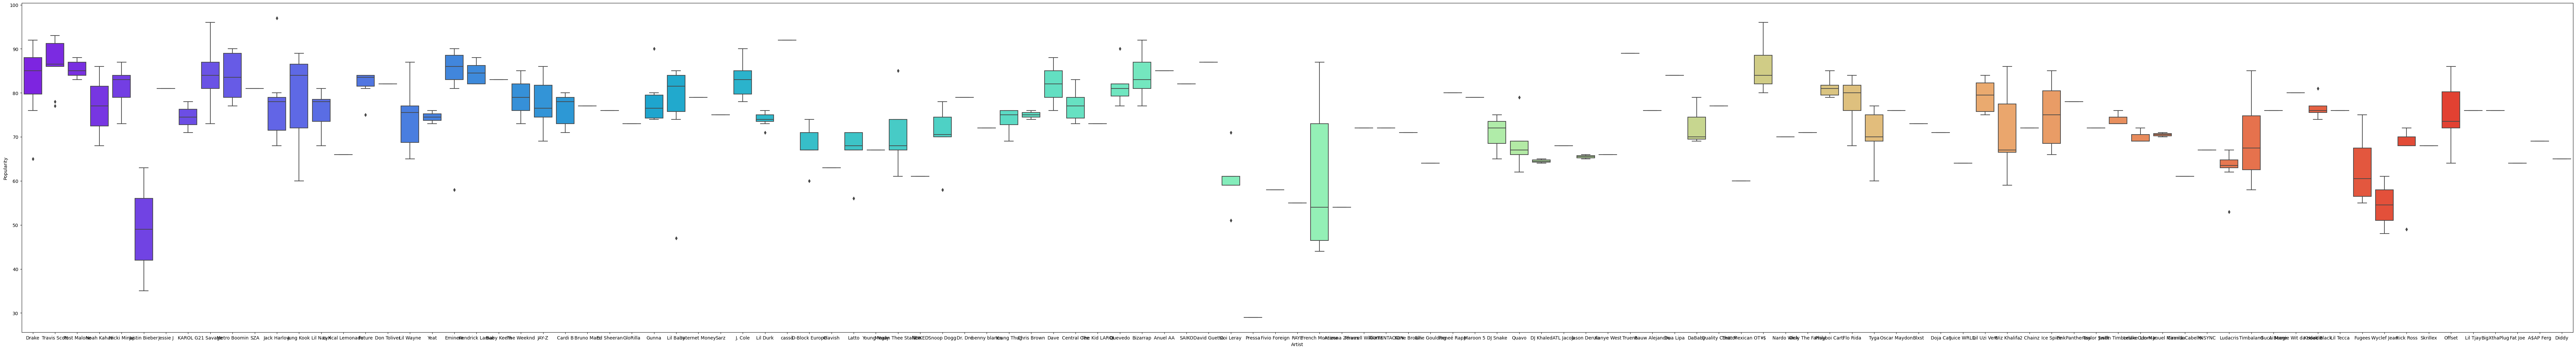

In [52]:
plt.figure(figsize=(100,13))
sns.boxplot(x="Artist", y="Popularity", data=df,palette='rainbow')

### 15.Use a scatter plot to explore the relationship between track duration and popularity.

<Axes: xlabel='Duration (ms)', ylabel='Popularity'>

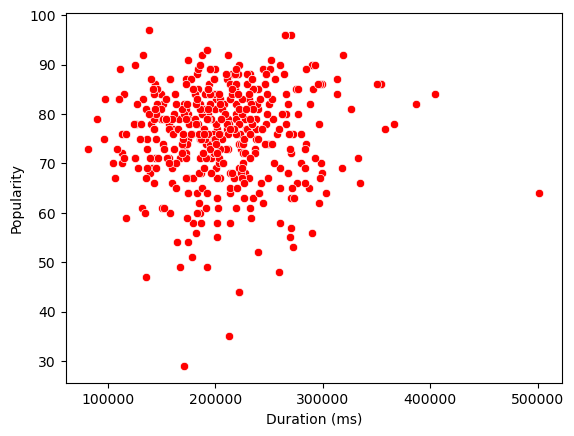

In [56]:
sns.scatterplot(x='Duration (ms)',y='Popularity',data = df,color='red')

### 16.Create a violin plot to compare the distribution of track durations for different artists.

<Axes: xlabel='Artist', ylabel='Duration (ms)'>

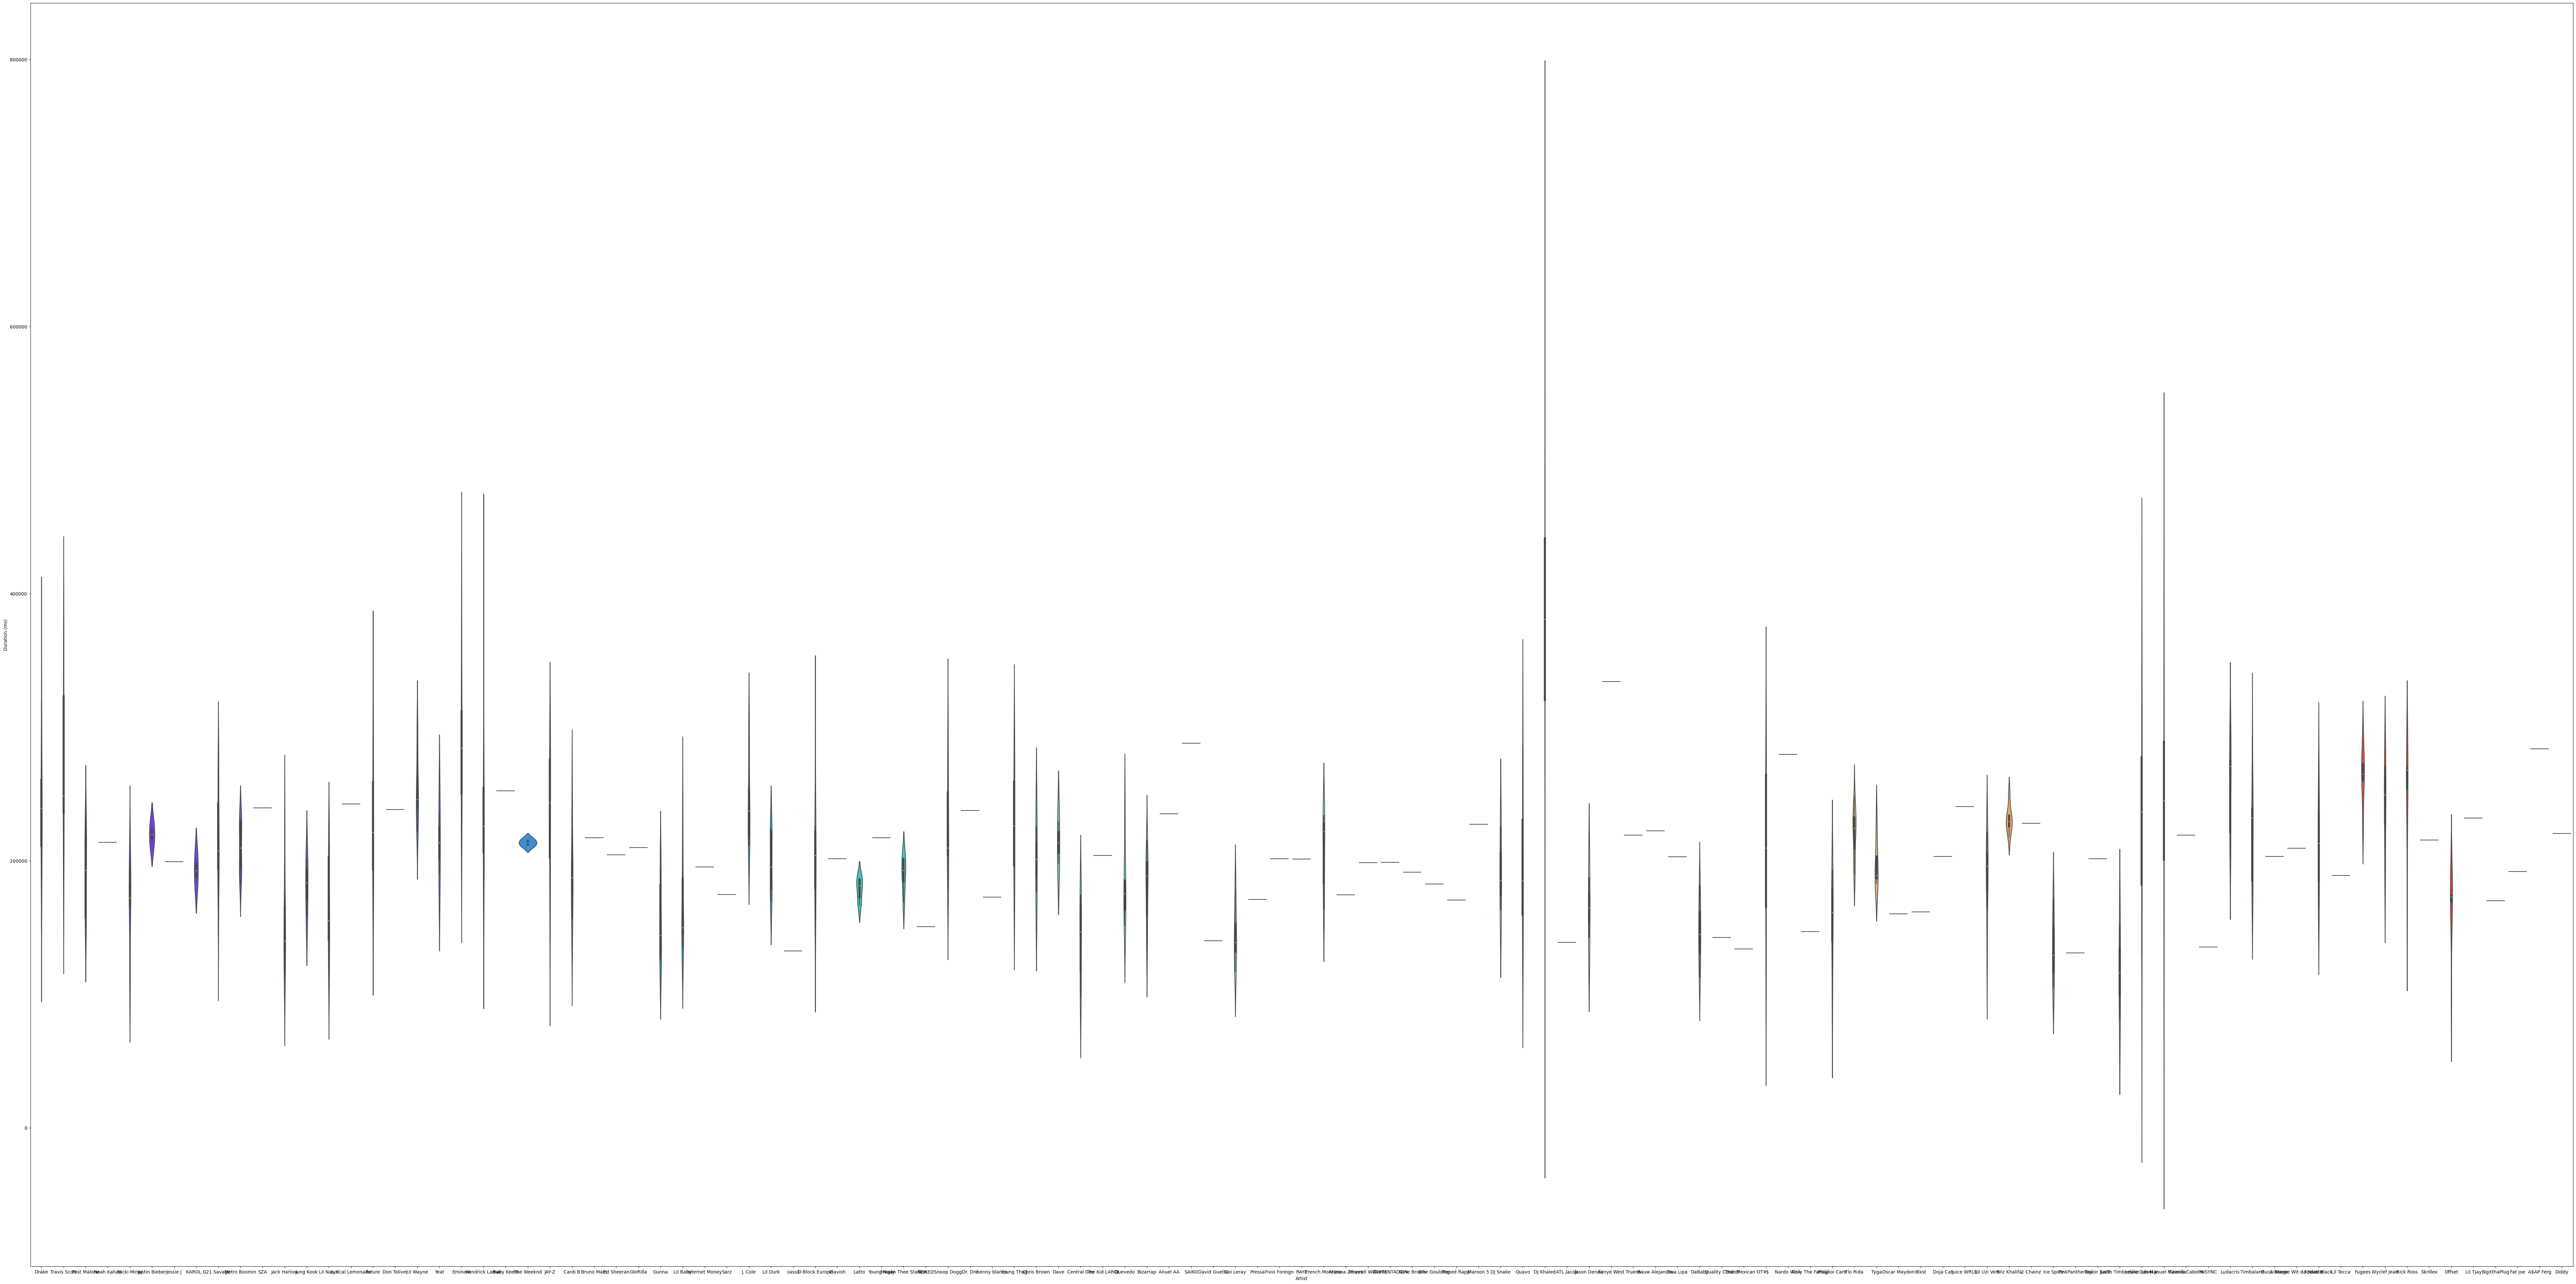

In [60]:
plt.figure(figsize=(100,50))
sns.violinplot(x='Artist',y='Duration (ms)',data=df,palette='rainbow')